# Data Pre-proceessing

In [13]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Load the Control Group dataset and read each csv file

In [15]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'

# Set the column names you want to extract
column_names = ['Recording timestamp', 'Participant name', 'Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction left Y','Gaze direction left Z','Gaze direction right X','Gaze direction right Y','Gaze direction right Z','Pupil diameter left','Pupil diameter right','Validity left','Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)','Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)','Original Media width','Original Media height','Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)']

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Print the file name and the first few rows of the DataFrame
        print(f"File Name: {filename}")
        print(df.head())

File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_0.csv
   Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0         667              4394847          2575955327          NaN   
1         668              4394847          2575955327          NaN   
2         669              4400762          2575961242  Eye Tracker   
3         670              4409117          2575969597  Eye Tracker   
4         671              4417439          2575977919  Eye Tracker   

    Project name Export date Participant name Recording name Recording date  \
0  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
1  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
2  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
3  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
4  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   

  Recording date 

In [16]:
 print(df.head())

   Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0       24426              5941116       1666143562634          NaN   
1       24427              5941116       1666143562634          NaN   
2       24428              5942507       1666143564025  Eye Tracker   
3       24429              5950816       1666143572334  Eye Tracker   
4       24430              5959228       1666143580746  Eye Tracker   

      Project name Export date Participant name Recording name Recording date  \
0  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
1  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
2  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
3  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
4  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   

  Recording date UTC  ... Original Media height Eye movement type  \
0         20.09.2

In [17]:
print(f"File Name: {filename}")
print(df.head())

File Name: EyeT_group_dataset_II_image_name_grey_orange_participant_60_trial_3.csv
   Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0       24426              5941116       1666143562634          NaN   
1       24427              5941116       1666143562634          NaN   
2       24428              5942507       1666143564025  Eye Tracker   
3       24429              5950816       1666143572334  Eye Tracker   
4       24430              5959228       1666143580746  Eye Tracker   

      Project name Export date Participant name Recording name Recording date  \
0  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
1  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
2  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
3  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   
4  Participant0060  20.09.2021  Participant0060     Recording4     20.09.2021   

  R

Count the number of NaN values from each column

In [18]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'

# Set the column names you want to extract
column_names = ['Recording timestamp', 'Participant name', 'Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction left Y','Gaze direction left Z','Gaze direction right X','Gaze direction right Y','Gaze direction right Z','Pupil diameter left','Pupil diameter right','Validity left','Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)','Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)','Original Media width','Original Media height','Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)']

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Print the file name
        print(f"File Name: {filename}")
        
        # Loop through each column
        for col in column_names:
            # Count the number of NaN values in the column
            nan_count = df[col].isna().sum()
            
            # Print the column name and the number of NaN values
            print(f"{col}: {nan_count}")

File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_0.csv
Recording timestamp: 0
Participant name: 0
Gaze point X: 243
Gaze point Y: 243
Gaze point left X: 652
Gaze point left Y: 652
Gaze point right X: 1072
Gaze point right Y: 1072
Gaze direction left X: 652
Gaze direction left Y: 652
Gaze direction left Z: 652
Gaze direction right X: 1072
Gaze direction right Y: 1072
Gaze direction right Z: 1072
Pupil diameter left: 5247
Pupil diameter right: 5240
Validity left: 19
Validity right: 19
Eye position left X (DACSmm): 652
Eye position left Y (DACSmm): 652
Eye position left Z (DACSmm): 652
Eye position right X (DACSmm): 1072
Eye position right Y (DACSmm): 1072
Eye position right Z (DACSmm): 1072
Gaze point left X (DACSmm): 652
Gaze point left Y (DACSmm): 652
Gaze point right X (DACSmm): 1072
Gaze point right Y (DACSmm): 1072
Gaze point X (MCSnorm): 278
Gaze point Y (MCSnorm): 278
Gaze point left X (MCSnorm): 684
Gaze point left Y (MCSnorm): 684
Gaze point right X (MC

Find the percentage of Nan values.
It is observed that the percentage of NaN value is below 80% so no columns is being dropped.

In [6]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'

# Set the column names you want to extract
column_names = ['Recording timestamp', 'Participant name', 'Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction left Y','Gaze direction left Z','Gaze direction right X','Gaze direction right Y','Gaze direction right Z','Pupil diameter left','Pupil diameter right','Validity left','Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)','Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)','Original Media width','Original Media height','Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)']

# Loop through each file in the directory
result = {}
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Calculate the percentage of NaN values for each column
        n_rows = len(df)
        nan_dict = {col: (df[col].isna().sum() / n_rows) * 100 for col in column_names}
        
        # Add the result to the dictionary
        result[filename] = nan_dict

# Print the result
for filename, nan_dict in result.items():
    print(f"File Name: {filename}")
    for col, nan_percentage in nan_dict.items():
        print(f"Column: {col} - NaN Percentage: {nan_percentage}")

File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_0.csv
Column: Recording timestamp - NaN Percentage: 0.0
Column: Participant name - NaN Percentage: 0.0
Column: Gaze point X - NaN Percentage: 3.3647189144281366
Column: Gaze point Y - NaN Percentage: 3.3647189144281366
Column: Gaze point left X - NaN Percentage: 9.027970091387427
Column: Gaze point left Y - NaN Percentage: 9.027970091387427
Column: Gaze point right X - NaN Percentage: 14.843533647189144
Column: Gaze point right Y - NaN Percentage: 14.843533647189144
Column: Gaze direction left X - NaN Percentage: 9.027970091387427
Column: Gaze direction left Y - NaN Percentage: 9.027970091387427
Column: Gaze direction left Z - NaN Percentage: 9.027970091387427
Column: Gaze direction right X - NaN Percentage: 14.843533647189144
Column: Gaze direction right Y - NaN Percentage: 14.843533647189144
Column: Gaze direction right Z - NaN Percentage: 14.843533647189144
Column: Pupil diameter left - NaN Percentage: 72.653

Replacing the Nan value using forward fill (ffill) and backward fill (bfill).

In [7]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'

# Set the column names you want to extract
column_names = ['Recording timestamp', 'Participant name', 'Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction left Y','Gaze direction left Z','Gaze direction right X','Gaze direction right Y','Gaze direction right Z','Pupil diameter left','Pupil diameter right','Validity left','Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)','Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)','Original Media width','Original Media height','Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)']

# Loop through each file in the directory
result = {}
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Replace NaN values with forward fill (ffill) and backward fill (bfill)
        df.fillna(method='ffill', inplace=True)
        df.fillna(method='bfill', inplace=True)
        
        # Add the result to the dictionary
        result[filename] = df

# Print the result
for filename, df in result.items():
    print(f"File Name: {filename}")
    print(df.head())

File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_0.csv
   Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0         667              4394847          2575955327  Eye Tracker   
1         668              4394847          2575955327  Eye Tracker   
2         669              4400762          2575961242  Eye Tracker   
3         670              4409117          2575969597  Eye Tracker   
4         671              4417439          2575977919  Eye Tracker   

    Project name Export date Participant name Recording name Recording date  \
0  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
1  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
2  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
3  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   
4  Participant10  29.10.2020  Participant0010     Recording1     29.10.2020   

  Recording date 

Checking if all the Nan value is dropped or not.

In [8]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'

# Set the column names you want to extract
column_names = ['Recording timestamp', 'Participant name', 'Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction left Y','Gaze direction left Z','Gaze direction right X','Gaze direction right Y','Gaze direction right Z','Pupil diameter left','Pupil diameter right','Validity left','Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)','Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)','Original Media width','Original Media height','Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)']

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Replace NaN values with forward fill (ffill) and backward fill (bfill)
        df.fillna(method='ffill', inplace=True)
        df.fillna(method='bfill', inplace=True)
        
        # Check for the presence of any NaN values in the DataFrame
        if df.isnull().values.any():
            print(f"File Name: {filename}")
            print("NaN values still present.")
        else:
            print(f"File Name: {filename}")
            print("All NaN values removed.")

File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_0.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_1.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_2.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_3.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_14_trial_1.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_14_trial_3.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_18_trial_0.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_18_trial_1.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_18_trial_2.csv
All NaN values removed.
File Name: EyeT_group_dataset_II_image_name_grey_blue_p

Finding the number of categorical columns and numeric columns.

In [9]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'
# Set the column names you want to extract
column_names = ['Recording timestamp', 'Participant name', 'Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction left Y','Gaze direction left Z','Gaze direction right X','Gaze direction right Y','Gaze direction right Z','Pupil diameter left','Pupil diameter right','Validity left','Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)','Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)','Original Media width','Original Media height','Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)']

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Replace NaN values with forward fill (ffill) and backward fill (bfill)
        df.fillna(method='ffill', inplace=True)
        df.fillna(method='bfill', inplace=True)
        
        # Count the number of columns that are categorical or numeric
        cat_cols = df.select_dtypes(include=['object']).columns.tolist()
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
        print(f"File Name: {filename}")
        print(f"Number of categorical columns: {len(cat_cols)}")
        print(f"Number of numeric columns: {len(num_cols)}")

File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_0.csv
Number of categorical columns: 46
Number of numeric columns: 25
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_1.csv
Number of categorical columns: 46
Number of numeric columns: 25
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_2.csv
Number of categorical columns: 46
Number of numeric columns: 25
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_3.csv
Number of categorical columns: 46
Number of numeric columns: 25
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_14_trial_1.csv
Number of categorical columns: 46
Number of numeric columns: 25
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_14_trial_3.csv
Number of categorical columns: 46
Number of numeric columns: 25
File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_18_trial_0.csv
Number of categorical columns: 46
Number of numer

Reading the name of  categorical columns and numeric columns.

In [10]:
import pandas as pd
import os

# Set the directory where the CSV files are located
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'
# Set the column names you want to extract
column_names = ['Recording timestamp', 'Participant name', 'Gaze point X','Gaze point Y','Gaze point left X','Gaze point left Y','Gaze point right X','Gaze point right Y','Gaze direction left X','Gaze direction left Y','Gaze direction left Z','Gaze direction right X','Gaze direction right Y','Gaze direction right Z','Pupil diameter left','Pupil diameter right','Validity left','Validity right','Eye position left X (DACSmm)','Eye position left Y (DACSmm)','Eye position left Z (DACSmm)','Eye position right X (DACSmm)','Eye position right Y (DACSmm)','Eye position right Z (DACSmm)','Gaze point left X (DACSmm)','Gaze point left Y (DACSmm)','Gaze point right X (DACSmm)','Gaze point right Y (DACSmm)','Gaze point X (MCSnorm)','Gaze point Y (MCSnorm)','Gaze point left X (MCSnorm)','Gaze point left Y (MCSnorm)','Gaze point right X (MCSnorm)','Gaze point right Y (MCSnorm)','Presented Media width','Presented Media height','Presented Media position X (DACSpx)','Presented Media position Y (DACSpx)','Original Media width','Original Media height','Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y','Fixation point X (MCSnorm)','Fixation point Y (MCSnorm)']

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Replace NaN values with forward fill (ffill) and backward fill (bfill)
        df.fillna(method='ffill', inplace=True)
        df.fillna(method='bfill', inplace=True)
        
        # Count the number of columns that are categorical or numeric
        cat_cols = df.select_dtypes(include=['object']).columns.tolist()
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
        
        print(f"File Name: {filename}")
        print(f"Number of categorical columns: {len(cat_cols)}")
        print(f"Number of numeric columns: {len(num_cols)}")
        print("Numeric columns: ", num_cols)
        print("Categorical columns: ", cat_cols)


File Name: EyeT_group_dataset_II_image_name_grey_blue_participant_10_trial_0.csv
Number of categorical columns: 46
Number of numeric columns: 25
Numeric columns:  ['Unnamed: 0', 'Recording timestamp', 'Computer timestamp', 'Recording duration', 'Recording resolution height', 'Recording resolution width', 'Eyetracker timestamp', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Presented Media width', 'Presented Media height', 'Presented Media position X (DACSpx)', 'Presented Media position Y (DACSpx)', 'Original Media width', 'Original Media height', 'Gaze event duration', 'Eye movement type index', 'Fixation point X', 'Fixation point Y', 'Mouse position X', 'Mouse position Y']
Categorical columns:  ['Sensor', 'Project name', 'Export date', 'Participant name', 'Recording name', 'Recording date', 'Recording date UTC', 'Recording start time', 'Recording start time UTC', 'Timeline name', 'Recording Fixation filter name',

# Feature Extraction 

Extracting the Numerical Columns. 

According to the requirement choosing the columns for getting the mean, standerd deviation, count and max value.

In [11]:
import os
import pandas as pd

# Path to the directory containing the CSV files
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'


# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

# Create an empty DataFrame to store all values
all_df = pd.DataFrame(columns=["File Name", "Recording timestamp Mean", "Eye movement type index Mean","Gaze point X std","Gaze point Y std","Gaze point left X std","Gaze point left Y std","Gaze point right X std","Gaze point right Y std","Fixation point X std","Fixation point Y std","Gaze event duration max","Presented Media width max","Presented Media height max","Presented Media position X (DACSpx) max","Presented Media position Y (DACSpx) max","Original Media width max","Original Media height max"])

# Loop through each CSV file and calculate the mean values
for file in csv_files:
    df = pd.read_csv(os.path.join(directory, file))

    # Fill missing values with the next value
    df = df.fillna(method='bfill')

    # Fill missing values with the previous value
    df = df.fillna(method='ffill')

    # One-hot encoding for Eye movement type index column
   # one_hot = pd.get_dummies(df['Eye movement type index'])
    #df = df.drop('Eye movement type index', axis=1)
    #df = df.join(one_hot)

    all_values = {"File Name": file,
                   "Recording timestamp Mean": df["Recording timestamp"].mean(),
                   "Eye movement type index Mean": df["Eye movement type index"].mean(),
                   "Gaze point X std": df["Gaze point X"].std(),
                   "Gaze point Y std":df["Gaze point Y"].std(),
                   "Gaze point left X std":df["Gaze point left X"].std(),
                   "Gaze point left Y std":df["Gaze point left Y"].std(),
                   "Gaze point right X std":df["Gaze point right X"].std(),
                   "Gaze point right Y std":df["Gaze point right Y"].std(),
                   "Fixation point X std":df["Fixation point X"].std(),
                   "Fixation point Y std":df["Fixation point Y"].std(),
                   "Gaze event duration max":df["Gaze event duration"].max(),
                   "Presented Media width max":df["Presented Media width"].max(),
                   "Presented Media height max":df["Presented Media height"].max(),
                  "Presented Media position X (DACSpx) max":df["Presented Media position X (DACSpx)"].max(),
                  "Presented Media position Y (DACSpx) max":df["Presented Media position Y (DACSpx)"].max(),
                  "Original Media width max":df["Original Media width"].max(),
                  "Original Media height max":df["Original Media height"].max()}
    
    all_df = all_df.append(all_values, ignore_index=True)

# Save the mean DataFrame to a new CSV file
all_df.to_csv("numeric_values.csv", index=False)

C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\3837086759.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(all_values, ignore_index=True)
C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\3837086759.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(all_values, ignore_index=True)
C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\3837086759.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(all_values, ignore_index=True)
C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\3837086759.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append

In [12]:
os.getcwd()

'C:\\Users\\sh22732'

Extracting the categorical columns. Then converting the categorical columns into numerical columns using label encoding.

According to the requirement choosing the columns for getting the mean, standerd deviation, count and max value.

In [13]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Path to the directory containing the CSV files
directory = 'M:\\Data Science\\A2\\Control Group\\Control Group 2'


# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

# Create an empty DataFrame to store all values
all_df = pd.DataFrame(columns=["File Name","Pupil diameter left max","Pupil diameter right max","Gaze direction left X std","Gaze direction left Y std","Gaze direction left Z std","Gaze direction right X std","Gaze direction right Y std","Gaze direction right Z std","Eye position left X (DACSmm) std","Eye position left Y (DACSmm) std","Eye position left Z (DACSmm) std","Eye position right X (DACSmm) std","Eye position right Y (DACSmm) std","Eye position right Z (DACSmm) std","Gaze point left X (DACSmm) std","Gaze point left Y (DACSmm) std","Gaze point right X (DACSmm) std","Gaze point right Y (DACSmm) std","Gaze point X (MCSnorm) std","Gaze point Y (MCSnorm) std","Gaze point left X (MCSnorm) std","Gaze point left Y (MCSnorm) std","Gaze point right X (MCSnorm) std","Gaze point right Y (MCSnorm) std","Fixation point X (MCSnorm) std","Fixation point Y (MCSnorm) std","Validity left count","Validity right count","Eye movement type count"])

# Loop through each CSV file and calculate the mean values
for file in csv_files:
    df = pd.read_csv(os.path.join(directory, file))

    # Fill missing values with the next value
    df = df.fillna(method='bfill')

    # Fill missing values with the previous value
    df = df.fillna(method='ffill')
    
# Convert categorical values to numerical using label encoding
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = le.fit_transform(df[col])
   


    all_values = {"File Name": file,
                 
                  "Pupil diameter left max": df["Pupil diameter left"].max(),
                  "Pupil diameter right max": df["Pupil diameter right"].max(),
                  "Gaze direction left X std": df["Gaze direction left X"].std(),
                  "Gaze direction left Y std": df["Gaze direction left Y"].std(),
                  "Gaze direction left Z std": df["Gaze direction left Z"].std(),
                  "Gaze direction right X std": df["Gaze direction right X"].std(),
                  "Gaze direction right Y std": df["Gaze direction right Y"].std(),
                  "Gaze direction right Z std": df["Gaze direction right Z"].std(),
                  "Eye position left X (DACSmm) std": df["Eye position left X (DACSmm)"].std(),
                  "Eye position left Y (DACSmm) std": df["Eye position left Y (DACSmm)"].std(),
                  "Eye position left Z (DACSmm) std": df["Eye position left Z (DACSmm)"].std(),
                  "Eye position right X (DACSmm) std": df["Eye position right X (DACSmm)"].std(),
                  "Eye position right Y (DACSmm) std": df["Eye position right Y (DACSmm)"].std(),
                  "Eye position right Z (DACSmm) std": df["Eye position right Z (DACSmm)"].std(),
                  "Gaze point left X (DACSmm) std": df["Gaze point left X (DACSmm)"].std(),
                  "Gaze point left Y (DACSmm) std": df["Gaze point left Y (DACSmm)"].std(),
                  "Gaze point right X (DACSmm) std": df["Gaze point right X (DACSmm)"].std(),
                  "Gaze point right Y (DACSmm) std": df["Gaze point right Y (DACSmm)"].std(),
                  "Gaze point X (MCSnorm) std": df["Gaze point X (MCSnorm)"].std(),
                  "Gaze point Y (MCSnorm) std": df["Gaze point Y (MCSnorm)"].std(),
                  "Gaze point left X (MCSnorm) std": df["Gaze point left X (MCSnorm)"].std(),
                  "Gaze point left Y (MCSnorm) std": df["Gaze point left Y (MCSnorm)"].std(),
                  "Gaze point right X (MCSnorm) std": df["Gaze point right X (MCSnorm)"].std(),
                  "Gaze point right Y (MCSnorm) std": df["Gaze point right Y (MCSnorm)"].std(),
                  "Fixation point X (MCSnorm) std": df["Fixation point X (MCSnorm)"].std(),
                  "Fixation point Y (MCSnorm) std": df["Fixation point Y (MCSnorm)"].std(),
                  "Validity left count": df["Validity left"].count(),
                  "Validity right count": df["Validity right"].count(),
                  "Eye movement type count": df["Eye movement type"].count()}
    
    all_df = all_df.append(all_values, ignore_index=True)

# Save the mean DataFrame to a new CSV file
all_df.to_csv("categorical_values.csv", index=False)

C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\644010683.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(all_values, ignore_index=True)
C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\644010683.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(all_values, ignore_index=True)
C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\644010683.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(all_values, ignore_index=True)
C:\Users\sh22732\AppData\Local\Temp\ipykernel_5968\644010683.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(all

# Creating New Data Frame for Questionnaire_datasetIA

By taking the mean, standed deviation, count and max value of each csv file making the new dataframe where there are 142 rows 
for 142 csv files and 47 columns which are essential for getting the accuracy.

Merging all the numerical and categorical columns and named the dataset as 'merged control.csv'.

In [14]:
import pandas as pd # my dataframe with extented empathy score for IA(even)

# Load the first CSV file
df1 = pd.read_csv('numeric_values.csv')

# Load the second CSV file
df2 = pd.read_csv('categorical_values.csv')

# Merge the two dataframes based on the 'participant_nr' column
merged_df = pd.merge(df1, df2, on='File Name')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged control.csv', index=False)

In [15]:
merged_df.shape

(142, 47)

From the dataset 'Questionnaire_datasetIA.csv' extracting the columns 'Participant nr' and 'Total Score extended'

Make a dataset named as 'empathy extended score IA.csv'.

In [16]:
import pandas as pd # modifiy the IA csv file with even number with 'Participant nr','Total Score extended'

# Read in the CSV file with the correct encoding
df = pd.read_csv('Questionnaire_datasetIA.csv', encoding='Windows-1252')

# Create a new DataFrame with just the two columns you want
new_df = df[['Participant nr','Total Score extended']]
# Filter out rows with odd participant numbers
new_df = new_df[new_df['Participant nr'] % 2 == 0]

# Write the new DataFrame to a CSV file
new_df.to_csv('empathy extended score IA.csv', index=False)

Merging the column 'Participant nr' and the dataset 'merged control.csv'. Name the merged dataset
as 'merged CG with participant nr.csv'.

In [17]:
import pandas as pd # file namewise participent number
import re

# Load your data into a dataframe
df = pd.read_csv('merged control.csv')

# Define a regular expression to match the number in the file name
pattern = r'\d+'

# Extract the number from each file name and create a new column 'nr'
df['Participant nr'] = df['File Name'].apply(lambda x: int(re.search(pattern, x).group()))

df.to_csv('merged CG with participant nr.csv', index=False)


Merging the previous two data set 'merged CG with participant nr.csv'and 'empathy extended score IA.csv' creating 
the final dataframe as 'New dataframe for the Control Group.csv'.

In [18]:
import pandas as pd # my dataframe with extented empathy score for IA(even)

# Load the first CSV file
df1 = pd.read_csv('merged CG with participant nr.csv')

# Load the second CSV file
df2 = pd.read_csv('empathy extended score IA.csv')

# Merge the two dataframes based on the 'participant_nr' column
merged_df = pd.merge(df1, df2, on='Participant nr')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('New dataframe for the Control Group.csv', index=False)

In [19]:
merged_df.shape

(142, 49)

In [20]:
merged_df.head()

,File Name,Recording timestamp Mean,Eye movement type index Mean,Gaze point X std,Gaze point Y std,Gaze point left X std,Gaze point left Y std,Gaze point right X std,Gaze point right Y std,Fixation point X std,...,Gaze point left Y (MCSnorm) std,Gaze point right X (MCSnorm) std,Gaze point right Y (MCSnorm) std,Fixation point X (MCSnorm) std,Fixation point Y (MCSnorm) std,Validity left count,Validity right count,Eye movement type count,Participant nr,Total Score extended
0,EyeT_group_dataset_II_image_name_grey_blue_par...,3.433023e+07,99.325672,263.417383,184.022517,266.123348,186.790705,260.009995,181.425624,263.789115,...,998.498528,892.535726,939.216928,47.004623,48.309219,7222,7222,7222,10,117
1,EyeT_group_dataset_II_image_name_grey_blue_par...,3.597488e+07,97.691612,285.985660,229.681948,290.183399,228.411449,291.828613,225.005425,289.322105,...,1019.156885,922.290747,1061.481171,39.226810,40.479258,7296,7296,7296,10,117
2,EyeT_group_dataset_II_image_name_grey_blue_par...,3.730088e+07,98.543349,449.928319,296.600542,454.054157,292.848413,336.000224,241.876018,451.336330,...,1115.153046,618.195177,710.900950,43.546304,42.750270,7255,7255,7255,10,117
3,EyeT_group_dataset_II_image_name_grey_blue_par...,2.760638e+07,62.041311,422.168612,291.750382,425.820691,292.843381,417.786224,289.088964,417.652184,...,812.663985,689.703259,769.998594,26.073817,27.522852,6100,6100,6100,10,117
4,EyeT_group_dataset_II_image_name_grey_blue_par...,4.642052e+07,1131.761687,145.098913,191.266395,144.758837,190.017291,144.851690,191.268911,140.586349,...,866.400883,500.304828,714.166929,14.823745,15.325697,9605,9605,9605,14,124


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 141
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   File Name                                142 non-null    object 
 1   Recording timestamp Mean                 142 non-null    float64
 2   Eye movement type index Mean             142 non-null    float64
 3   Gaze point X std                         142 non-null    float64
 4   Gaze point Y std                         142 non-null    float64
 5   Gaze point left X std                    142 non-null    float64
 6   Gaze point left Y std                    142 non-null    float64
 7   Gaze point right X std                   142 non-null    float64
 8   Gaze point right Y std                   142 non-null    float64
 9   Fixation point X std                     142 non-null    float64
 10  Fixation point Y std                     142 non-n

In [22]:
merged_df.isna().sum()

File Name                                  0
Recording timestamp Mean                   0
Eye movement type index Mean               0
Gaze point X std                           0
Gaze point Y std                           0
Gaze point left X std                      0
Gaze point left Y std                      0
Gaze point right X std                     0
Gaze point right Y std                     0
Fixation point X std                       0
Fixation point Y std                       0
Gaze event duration max                    0
Presented Media width max                  0
Presented Media height max                 0
Presented Media position X (DACSpx) max    0
Presented Media position Y (DACSpx) max    0
Original Media width max                   0
Original Media height max                  0
Pupil diameter left max                    0
Pupil diameter right max                   0
Gaze direction left X std                  0
Gaze direction left Y std                  0
Gaze direc

In [23]:
merged_df.describe()
## to have an overview of the data set

,Recording timestamp Mean,Eye movement type index Mean,Gaze point X std,Gaze point Y std,Gaze point left X std,Gaze point left Y std,Gaze point right X std,Gaze point right Y std,Fixation point X std,Fixation point Y std,...,Gaze point left Y (MCSnorm) std,Gaze point right X (MCSnorm) std,Gaze point right Y (MCSnorm) std,Fixation point X (MCSnorm) std,Fixation point Y (MCSnorm) std,Validity left count,Validity right count,Eye movement type count,Participant nr,Total Score extended
count,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,3.881358e+07,209.326921,279.543878,236.907705,281.074012,240.606450,268.605029,227.366130,258.023132,222.640879,...,923.644846,770.410892,875.008732,40.514610,41.472521,7518.042254,7518.042254,7518.042254,26.915493,121.394366
std,1.695157e+07,174.077312,76.189762,55.811757,79.573520,60.529396,77.363708,56.415150,82.458901,57.283310,...,320.793027,296.736268,333.412682,26.270907,28.211049,3678.080666,3678.080666,3678.080666,18.417727,11.374326
min,1.035229e+07,39.836139,74.696514,76.404324,76.663253,76.685292,73.259557,76.517156,61.079835,75.453300,...,149.691501,88.838374,53.704877,5.050648,5.453155,639.000000,639.000000,639.000000,2.000000,94.000000
25%,3.389584e+07,109.934611,234.902327,204.708885,235.329233,205.663461,222.974780,189.707561,202.732710,189.511344,...,752.405281,610.138190,688.393007,28.118337,28.223080,7212.750000,7212.750000,7212.750000,8.000000,116.000000
50%,3.534749e+07,150.836318,279.840439,244.702648,281.763829,240.851098,269.786065,237.549491,253.079907,227.373330,...,954.114905,792.494421,878.294508,38.537597,39.907272,7259.500000,7259.500000,7259.500000,24.000000,121.000000
75%,3.897267e+07,248.959558,334.494468,270.627250,341.195191,272.477266,325.899445,264.640739,301.979466,265.993726,...,1113.510091,962.965703,1046.752202,49.479643,50.078183,7512.000000,7512.000000,7512.000000,43.500000,130.500000
max,1.182508e+08,1131.761687,449.928319,371.149646,454.054157,496.866070,433.629146,372.842130,451.336330,360.594048,...,2004.677089,1567.086901,1967.603048,170.275155,184.274213,26771.000000,26771.000000,26771.000000,60.000000,143.000000


In [24]:
merged_df.dtypes

File Name                                   object
Recording timestamp Mean                   float64
Eye movement type index Mean               float64
Gaze point X std                           float64
Gaze point Y std                           float64
Gaze point left X std                      float64
Gaze point left Y std                      float64
Gaze point right X std                     float64
Gaze point right Y std                     float64
Fixation point X std                       float64
Fixation point Y std                       float64
Gaze event duration max                    float64
Presented Media width max                  float64
Presented Media height max                 float64
Presented Media position X (DACSpx) max    float64
Presented Media position Y (DACSpx) max    float64
Original Media width max                   float64
Original Media height max                  float64
Pupil diameter left max                      int64
Pupil diameter right max       

In [25]:
# Load data from csv file
merged_df = pd.read_csv("New dataframe for the Control Group.csv")

# Print data types of each column
print(merged_df.dtypes)

# Count number of categorical values in each column
print("Categorical value counts:")
for col in merged_df.select_dtypes(include=['object']):
    print(col, merged_df[col].value_counts())

# Count number of numeric values in each column
print("Numeric value counts:")
for col in merged_df.select_dtypes(include=['int', 'float']):
    print(col, merged_df[col].value_counts())

File Name                                   object
Recording timestamp Mean                   float64
Eye movement type index Mean               float64
Gaze point X std                           float64
Gaze point Y std                           float64
Gaze point left X std                      float64
Gaze point left Y std                      float64
Gaze point right X std                     float64
Gaze point right Y std                     float64
Fixation point X std                       float64
Fixation point Y std                       float64
Gaze event duration max                    float64
Presented Media width max                  float64
Presented Media height max                 float64
Presented Media position X (DACSpx) max    float64
Presented Media position Y (DACSpx) max    float64
Original Media width max                   float64
Original Media height max                  float64
Pupil diameter left max                      int64
Pupil diameter right max       

In [26]:
cat_cols = merged_df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['File Name']


The target of the data frame is the column "Total Score extended".Checking the varibales of the column.

<AxesSubplot:>

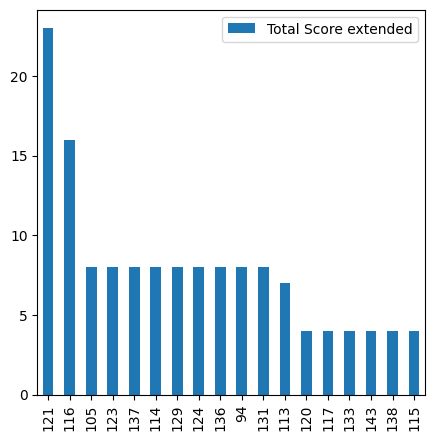

In [27]:
pd.DataFrame(merged_df["Total Score extended"].value_counts()).plot(kind="bar",figsize=(5,5))

In [29]:
merged_df.nunique().sort_values()

Presented Media position Y (DACSpx) max      1
Presented Media height max                   2
Presented Media position X (DACSpx) max      3
Original Media height max                    4
Original Media width max                     4
Presented Media width max                    4
Total Score extended                        18
Participant nr                              30
Pupil diameter left max                     77
Pupil diameter right max                    86
Eye movement type count                     99
Validity left count                         99
Validity right count                        99
Gaze event duration max                    101
Eye position right Z (DACSmm) std          118
Gaze point left X (DACSmm) std             118
Gaze point left Y (DACSmm) std             118
Gaze point right X (DACSmm) std            118
Gaze point right Y (DACSmm) std            118
Gaze point X (MCSnorm) std                 118
Gaze point right X (MCSnorm) std           118
Eye position 

In [8]:
# Dropping the column 'File Name' and 'Participant nr'.
new_df = merged_df.drop(['File Name', 'Participant nr'], axis=1)

In [9]:
new_df


,Recording timestamp Mean,Eye movement type index Mean,Gaze point X std,Gaze point Y std,Gaze point left X std,Gaze point left Y std,Gaze point right X std,Gaze point right Y std,Fixation point X std,Fixation point Y std,...,Gaze point left X (MCSnorm) std,Gaze point left Y (MCSnorm) std,Gaze point right X (MCSnorm) std,Gaze point right Y (MCSnorm) std,Fixation point X (MCSnorm) std,Fixation point Y (MCSnorm) std,Validity left count,Validity right count,Eye movement type count,Total Score extended
0,3.433023e+07,99.325672,263.417383,184.022517,266.123348,186.790705,260.009995,181.425624,263.789115,181.442909,...,914.774328,998.498528,892.535726,939.216928,47.004623,48.309219,7222,7222,7222,117
1,3.597488e+07,97.691612,285.985660,229.681948,290.183399,228.411449,291.828613,225.005425,289.322105,222.149891,...,911.315023,1019.156885,922.290747,1061.481171,39.226810,40.479258,7296,7296,7296,117
2,3.730088e+07,98.543349,449.928319,296.600542,454.054157,292.848413,336.000224,241.876018,451.336330,291.431232,...,1087.324546,1115.153046,618.195177,710.900950,43.546304,42.750270,7255,7255,7255,117
3,2.760638e+07,62.041311,422.168612,291.750382,425.820691,292.843381,417.786224,289.088964,417.652184,286.011741,...,715.041518,812.663985,689.703259,769.998594,26.073817,27.522852,6100,6100,6100,117
4,4.642052e+07,1131.761687,145.098913,191.266395,144.758837,190.017291,144.851690,191.268911,140.586349,192.131189,...,559.320141,866.400883,500.304828,714.166929,14.823745,15.325697,9605,9605,9605,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.454407e+07,123.696540,348.195147,263.231043,348.720574,266.853183,359.437361,269.704541,318.768719,262.027804,...,1086.368688,997.565094,1069.764207,1030.860348,41.084894,41.397785,7398,7398,7398,121
138,3.551248e+07,188.272075,269.608525,300.558986,271.133153,298.431022,267.432735,300.266022,202.240151,264.436224,...,997.211804,1090.325773,1034.690912,1148.950074,37.916347,42.991139,7248,7248,7248,115
139,4.271202e+07,257.791912,264.456991,268.899033,270.310276,267.858520,255.786411,268.392691,218.218237,255.283896,...,1024.940335,1014.530252,1108.573224,1155.032959,54.374087,56.560900,8828,8828,8828,115
140,3.457366e+07,234.419286,290.229193,276.130932,295.652202,274.167354,278.200379,278.856312,232.850603,258.327262,...,863.540734,940.222160,961.075614,1087.453509,34.966950,42.334175,7446,7446,7446,115


Fitting the dataframe into the Random Forest Classifier using leave-one-out cross-validation iterator.

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut

# Assuming your dataset is already imported into a Pandas dataframe called `new_df`
X = new_df.drop("Total Score extended", axis=1) # assuming the name of the target variable is 'target_variable'
y = new_df["Total Score extended"]

# Create an instance of the Random Forest model
rf = RandomForestClassifier()

# Create a leave-one-out cross-validation iterator
loo = LeaveOneOut()

# Initialize an empty list to store the scores
scores = []

# Iterate over the splits and train/validate the model
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    scores.append(score)

# Compute the mean score across all splits
mean_score = sum(scores) / len(scores)
print("Mean accuracy:", mean_score)


Mean accuracy: 0.4507042253521127


Fitting the dataframe into the Logistic Regression using leave-one-out cross-validation iterator.

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

# Assuming your dataset is already imported into a Pandas dataframe called `new_df`
X = new_df.drop("Total Score extended", axis=1) # assuming the name of the target variable is 'target_variable'
y = new_df["Total Score extended"]

# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Create a leave-one-out cross-validation iterator
loo = LeaveOneOut()

# Initialize an empty list to store the scores
scores = []

# Iterate over the splits and train/validate the model
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logreg.fit(X_train, y_train)
    score = logreg.score(X_test, y_test)
    scores.append(score)

# Compute the mean score across all splits
mean_score = sum(scores) / len(scores)
print("Mean accuracy:", mean_score)

Mean accuracy: 0.1619718309859155


Fitting the dataframe into the SVM using leave-one-out cross-validation iterator.

In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut

# Assuming your dataset is already imported into a Pandas dataframe called `new_df`
X = new_df.drop("Total Score extended", axis=1) # assuming the name of the target variable is 'target_variable'
y = new_df["Total Score extended"]

# Create an instance of the SVM model
svm = SVC()

# Create a leave-one-out cross-validation iterator
loo = LeaveOneOut()

# Initialize an empty list to store the scores
scores = []

# Iterate over the splits and train/validate the model
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    scores.append(score)

# Compute the mean score across all splits
mean_score = sum(scores) / len(scores)
print("Mean accuracy:", mean_score)

Mean accuracy: 0.14788732394366197


# # Creating New Data Frame for Questionnaire_datasetIB

Merging all the data set 'Questionnaire_datasetIB.csv' and the column 'Participant nr' and 'Total Score extended' 
and named the dataset as 'empathy extended score IB.csv'.

In [19]:
import pandas as pd # modifiy the IA csv file with even number with 'Participant nr','Total Score extended'

# Read in the CSV file with the correct encoding
df = pd.read_csv('Questionnaire_datasetIB.csv', encoding='Windows-1252')

# Create a new DataFrame with just the two columns you want
new_df = df[['Participant nr','Total Score extended']]
# Filter out rows with odd participant numbers
new_df = new_df[new_df['Participant nr'] % 2 == 0]

# Write the new DataFrame to a CSV file
new_df.to_csv('empathy extended score IB.csv', index=False)

Merging the column 'Participant nr' and the dataset 'merged control.csv'. Name the merged dataset
as 'merged CG with participant nr.csv'

In [20]:
import pandas as pd # file namewise participent number
import re

# Load your data into a dataframe
df = pd.read_csv('merged control.csv')

# Define a regular expression to match the number in the file name
pattern = r'\d+'

# Extract the number from each file name and create a new column 'nr'
df['Participant nr'] = df['File Name'].apply(lambda x: int(re.search(pattern, x).group()))

df.to_csv('merged CG with participant nr.csv', index=False)

Merging the previous two data set 'merged CG with participant nr.csv'and 'empathy extended score IB.csv' creating 
the final dataframe as 'New dataframe for the Control Group1B.csv'.

In [21]:
import pandas as pd # my dataframe with extented empathy score for IA(even)

# Load the first CSV file
df1 = pd.read_csv('merged CG with participant nr.csv')

# Load the second CSV file
df2 = pd.read_csv('empathy extended score IB.csv')

# Merge the two dataframes based on the 'participant_nr' column
merged_df = pd.merge(df1, df2, on='Participant nr')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('New dataframe for the Control Group1B.csv', index=False)

In [22]:
merged_df.shape

(142, 49)

In [23]:
merged_df.head()

,File Name,Recording timestamp Mean,Eye movement type index Mean,Gaze point X std,Gaze point Y std,Gaze point left X std,Gaze point left Y std,Gaze point right X std,Gaze point right Y std,Fixation point X std,...,Gaze point left Y (MCSnorm) std,Gaze point right X (MCSnorm) std,Gaze point right Y (MCSnorm) std,Fixation point X (MCSnorm) std,Fixation point Y (MCSnorm) std,Validity left count,Validity right count,Eye movement type count,Participant nr,Total Score extended
0,EyeT_group_dataset_II_image_name_grey_blue_par...,3.433023e+07,99.325672,263.417383,184.022517,266.123348,186.790705,260.009995,181.425624,263.789115,...,998.498528,892.535726,939.216928,47.004623,48.309219,7222,7222,7222,10,100
1,EyeT_group_dataset_II_image_name_grey_blue_par...,3.597488e+07,97.691612,285.985660,229.681948,290.183399,228.411449,291.828613,225.005425,289.322105,...,1019.156885,922.290747,1061.481171,39.226810,40.479258,7296,7296,7296,10,100
2,EyeT_group_dataset_II_image_name_grey_blue_par...,3.730088e+07,98.543349,449.928319,296.600542,454.054157,292.848413,336.000224,241.876018,451.336330,...,1115.153046,618.195177,710.900950,43.546304,42.750270,7255,7255,7255,10,100
3,EyeT_group_dataset_II_image_name_grey_blue_par...,2.760638e+07,62.041311,422.168612,291.750382,425.820691,292.843381,417.786224,289.088964,417.652184,...,812.663985,689.703259,769.998594,26.073817,27.522852,6100,6100,6100,10,100
4,EyeT_group_dataset_II_image_name_grey_blue_par...,4.642052e+07,1131.761687,145.098913,191.266395,144.758837,190.017291,144.851690,191.268911,140.586349,...,866.400883,500.304828,714.166929,14.823745,15.325697,9605,9605,9605,14,128


In [24]:
# Dropping the column 'File Name' and 'Participant nr'.
new_df = merged_df.drop(['File Name', 'Participant nr'], axis=1)

In [25]:
new_df

,Recording timestamp Mean,Eye movement type index Mean,Gaze point X std,Gaze point Y std,Gaze point left X std,Gaze point left Y std,Gaze point right X std,Gaze point right Y std,Fixation point X std,Fixation point Y std,...,Gaze point left X (MCSnorm) std,Gaze point left Y (MCSnorm) std,Gaze point right X (MCSnorm) std,Gaze point right Y (MCSnorm) std,Fixation point X (MCSnorm) std,Fixation point Y (MCSnorm) std,Validity left count,Validity right count,Eye movement type count,Total Score extended
0,3.433023e+07,99.325672,263.417383,184.022517,266.123348,186.790705,260.009995,181.425624,263.789115,181.442909,...,914.774328,998.498528,892.535726,939.216928,47.004623,48.309219,7222,7222,7222,100
1,3.597488e+07,97.691612,285.985660,229.681948,290.183399,228.411449,291.828613,225.005425,289.322105,222.149891,...,911.315023,1019.156885,922.290747,1061.481171,39.226810,40.479258,7296,7296,7296,100
2,3.730088e+07,98.543349,449.928319,296.600542,454.054157,292.848413,336.000224,241.876018,451.336330,291.431232,...,1087.324546,1115.153046,618.195177,710.900950,43.546304,42.750270,7255,7255,7255,100
3,2.760638e+07,62.041311,422.168612,291.750382,425.820691,292.843381,417.786224,289.088964,417.652184,286.011741,...,715.041518,812.663985,689.703259,769.998594,26.073817,27.522852,6100,6100,6100,100
4,4.642052e+07,1131.761687,145.098913,191.266395,144.758837,190.017291,144.851690,191.268911,140.586349,192.131189,...,559.320141,866.400883,500.304828,714.166929,14.823745,15.325697,9605,9605,9605,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.454407e+07,123.696540,348.195147,263.231043,348.720574,266.853183,359.437361,269.704541,318.768719,262.027804,...,1086.368688,997.565094,1069.764207,1030.860348,41.084894,41.397785,7398,7398,7398,142
138,3.551248e+07,188.272075,269.608525,300.558986,271.133153,298.431022,267.432735,300.266022,202.240151,264.436224,...,997.211804,1090.325773,1034.690912,1148.950074,37.916347,42.991139,7248,7248,7248,125
139,4.271202e+07,257.791912,264.456991,268.899033,270.310276,267.858520,255.786411,268.392691,218.218237,255.283896,...,1024.940335,1014.530252,1108.573224,1155.032959,54.374087,56.560900,8828,8828,8828,125
140,3.457366e+07,234.419286,290.229193,276.130932,295.652202,274.167354,278.200379,278.856312,232.850603,258.327262,...,863.540734,940.222160,961.075614,1087.453509,34.966950,42.334175,7446,7446,7446,125


Fitting the dataframe into the Random Forest Classifier using leave-one-out cross-validation iterator.

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut

# Assuming your dataset is already imported into a Pandas dataframe called `new_df`
X = new_df.drop("Total Score extended", axis=1) # assuming the name of the target variable is 'target_variable'
y = new_df["Total Score extended"]

# Create an instance of the Random Forest model
rf = RandomForestClassifier()

# Create a leave-one-out cross-validation iterator
loo = LeaveOneOut()

# Initialize an empty list to store the scores
scores = []

# Iterate over the splits and train/validate the model
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    scores.append(score)

# Compute the mean score across all splits
mean_score = sum(scores) / len(scores)
print("Mean accuracy:", mean_score)


Mean accuracy: 0.49295774647887325


Fitting the dataframe into the Logistic Regression using leave-one-out cross-validation iterator.

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

# Assuming your dataset is already imported into a Pandas dataframe called `new_df`
X = new_df.drop("Total Score extended", axis=1) # assuming the name of the target variable is 'target_variable'
y = new_df["Total Score extended"]

# Create an instance of the logistic regression model
logreg = LogisticRegression()

# Create a leave-one-out cross-validation iterator
loo = LeaveOneOut()

# Initialize an empty list to store the scores
scores = []

# Iterate over the splits and train/validate the model
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logreg.fit(X_train, y_train)
    score = logreg.score(X_test, y_test)
    scores.append(score)

# Compute the mean score across all splits
mean_score = sum(scores) / len(scores)
print("Mean accuracy:", mean_score)

Mean accuracy: 0.1056338028169014
